In [29]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
from data import load_dataset
from PIL import Image


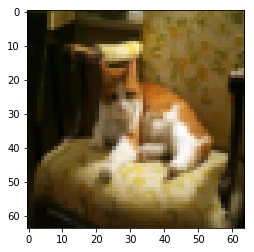

In [30]:

#get data variables 
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=load_dataset()
#Plot a sample image
plt.imshow(train_set_x_orig[7])

In [41]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig[0]
num_px=train_set_x_orig.shape[1]

#===> Reshape Training and Test sets
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print(np.shape(train_set_x_flatten))

(12288, 209)


In [42]:
#====> Normalize the array values to minify the value. Divide by 255 which is max color value
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [43]:
'''Compose Sigmoid Function'''
def sigmoid(z):
    return 1/(1+np.exp(-z))

'''Initialize Weights with Zeros for given dimention'''
def initWeights(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b

'''Compose both forward & backward propagation'''
def propagate(w,b,X,Y):
    
    #Solve Z=wT.X+b
    
    #number of training models
    m=X.shape[1];
    
    
    #===> Forward propagation
    #     1. Compose yHat ie, A
    #     2. Compose Cost
    z=np.dot(w.T,X)+b
    yHat=A=sigmoid(z)
    cost=-((Y*np.log(A)+(1-Y)*np.log(1-A)))/m #we can also use -np.mean(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    #===> Backward propagation
    dz=np.subtract(A,Y)
    dw = np.dot(X,dz.T)/m
    db = np.sum(dz)/m
    
    #Squeeze cost array to make single dimentional array.
    cost = np.squeeze(cost)
        
    grads = {"dw": dw,"db": db}
    
    return grads, cost

In [44]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)

In [45]:
def optimize(w,b,X,Y,iterations,learning_rate):
    #collect all the costs that are coming in iteratins
    
    costs=[];
    
    for i in range(iterations):
        grads,cost=propagate(w,b,X,Y)
        
        dw=grads['dw']
        db=grads['db']
        
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if(i%100==0):
            costs.append(cost)
            
    params={'w':w,'b':b};
    grads={'dw':dw,'db':db}
    
    return params,grads,costs;

In [46]:

def predict(w, b, X):
    m=X.shape[1];
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    z=np.dot(w.T,X);
    
    
    A = 1/(1+np.exp(-z)) 
    
    for i in range(A.shape[1]):
        Y_prediction[0,i]=1 if A[0,i]>0.5 else 0
        pass
        
    return Y_prediction

In [47]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    w,b=initWeights(X_train.shape[0])
    
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [48]:
#train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes=load_dataset()
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


/home/wularmotors/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/wularmotors/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


[[1.]]


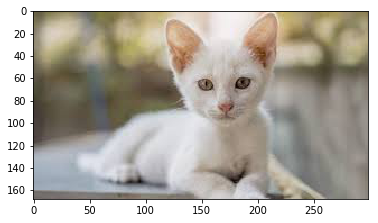

In [53]:
my_image='cat3.jpg'
path='images/'+my_image
image=np.array(ndimage.imread(path,flatten=False))
my_image=scipy.misc.imresize(image,size=(num_px,num_px)).reshape((1,num_px*num_px*3)).T
my_predict=predict(d['w'],d['b'],my_image)

plt.imshow(image)

print(my_predict)
